In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1. Data Understanding and Initial Setup

Loading the datasets

In [2]:
stores= pd.read_csv('compdata/stores.csv')
features= pd.read_csv('compdata/features.csv')
test= pd.read_csv('compdata/test.csv')
train= pd.read_csv('compdata/train.csv')

Initial Inspection

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


lets check the average size of each type of store

In [4]:
avg_size = stores.groupby('Type')['Size'].mean()
avg_size.head()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

### Description of Fields in the Features Dataset

- **Store**: The store number.
- **Date**: The specific week being referred to.
- **Temperature**: The average temperature in the region.
- **Fuel_Price**: The cost of fuel in the region.
- **MarkDown1-5**: Anonymized data related to promotional markdowns that Walmart is running. This data is only available after November 2011 and is not present for all stores or for all weeks. Missing values are marked with NA.
- **CPI (Consumer Price Index)**: A measure that examines the weighted average of prices of a basket of consumer goods and services.
- **Unemployment**: The unemployment rate in the region.
- **IsHoliday**: A boolean indicator specifying whether the week is a holiday week or not.


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


weekly sales cannot be negative as it is impossible for one department to not to sell antthing the whole week 

In [8]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


replacing the markdowns with NaN with 0

In [10]:
features= features.fillna(0)

In [11]:
features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

merging train+features+stores and test+features+stores for easier EDA

In [12]:
df =train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


removing the duplicated column IsHoliday_x

In [13]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)

Rname the column

In [14]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [15]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [16]:
df['Store'].nunique()

45

In [17]:
df['Dept'].nunique() 

81

calculating weekly average sales for each store with respect to each department, there are 45 stores and 81 departments

In [18]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

C:\Users\cvish\AppData\Local\Temp\ipykernel_23180\2185623706.py:1: FutureWarning: The provided callable <function mean at 0x000001E4FD1523E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean)


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


we can observe there are 99 displayed range for the department number which indicates some missing values and also there are some negative values for weekly sales which is not possible so we have to change that

In [19]:
#check for values less than 0
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743,B,118221


1358 rows are very less in comparision to almost 420000 records , almost 0.3% which can be deleted whithout having a major impact on the date quality

In [20]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

validating values of the Date columns and finding the range of the data

In [21]:
pd.concat([df['Date'].head(5), df['Date'].tail(5)])

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

our data starts from 5th Feb 2010 till 26th October 2012

In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


now coming to IsHoliday column, lets visualize the sales during holidays and non holidays

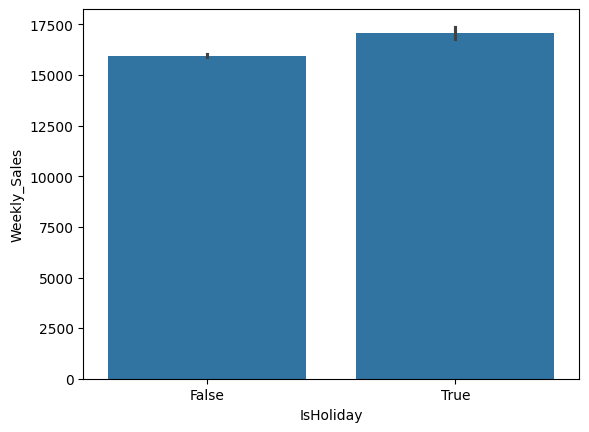

In [23]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.show()

we can see the average weekly sales for Holidays is significantly higher than not-holidays days.
we have 4 Holiday values such as :

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

to visualize the amount of sales w.r.t each holidays we need to create respective columns for the holidays and fill them with True or False w.r.t the dates given to us

In [24]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [25]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False


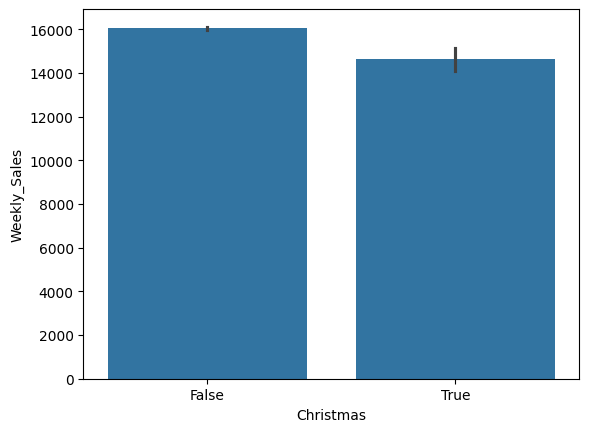

In [26]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)
plt.show()

weekly sales are much higher on a non christmas day

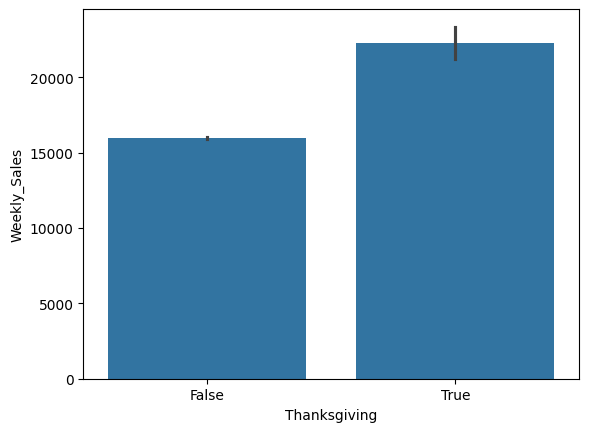

In [27]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)
plt.show()

during thanksgiving sales are significantly higer indicating more demand on Thanksgiving

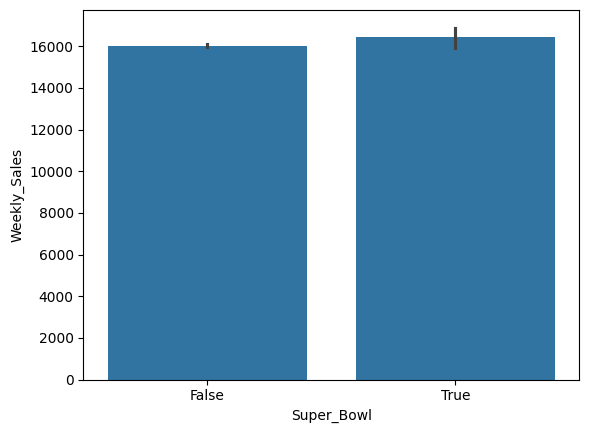

In [28]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)
plt.show()

Sales during Super Bowl didnt fluctuate by much when there was no Super Bowl

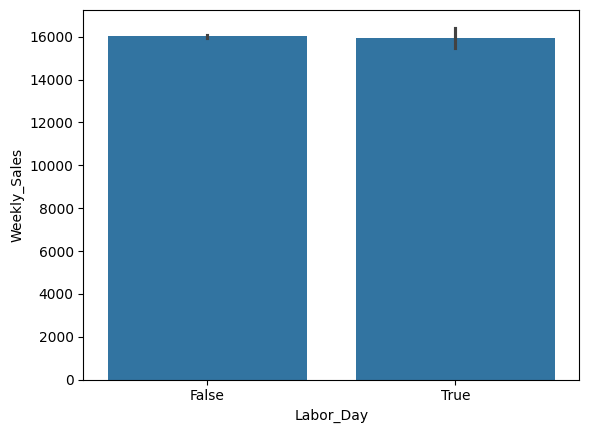

In [29]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)
plt.show()

Similarly for labour day, the sales remained constant indicating constant demand

from the graphs we can infer that, Labour Day and Christmas didnt increase the weekly average sales.
The higest difference is in the Thanksgiving week due to maybe BlackFriday Sales. people mayble also prefer to buy christmas gifts 1-2 weeks prior so it didnt change the slaes int he christmas week

now we analyze the effects of holidays on store types A(large stores),B(medium),C(small stores)

In [30]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean() 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [31]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [32]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [33]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

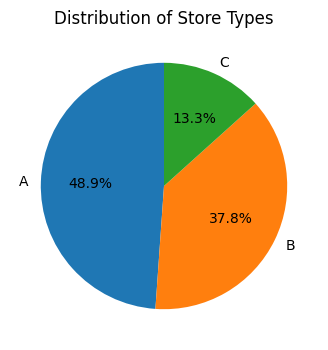

In [34]:
store_type_counts = stores['Type'].value_counts()

plt.figure(figsize=(4, 4))
store_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Store Types')
plt.ylabel('')
plt.show()

almost half of the stores are of type-A 

In [35]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

In [36]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False


calculate averasge sales for each store type for each holiday type

In [37]:
df_a = df[df['Type'] == 'A']
avg_sales_by_holiday = {}
avg_sales_by_holiday['Super_Bowl'] = df_a[df_a['Super_Bowl']]['Weekly_Sales'].mean() if not df_a[df_a['Super_Bowl']].empty else 0
avg_sales_by_holiday['Labor_Day'] = df_a[df_a['Labor_Day']]['Weekly_Sales'].mean() if not df_a[df_a['Labor_Day']].empty else 0
avg_sales_by_holiday['Thanksgiving'] = df_a[df_a['Thanksgiving']]['Weekly_Sales'].mean() if not df_a[df_a['Thanksgiving']].empty else 0
avg_sales_by_holiday['Christmas'] = df_a[df_a['Christmas']]['Weekly_Sales'].mean() if not df_a[df_a['Christmas']].empty else 0
avg_sales_df = pd.DataFrame.from_dict(avg_sales_by_holiday, orient='index', columns=['Average_Weekly_Sales'])

In [38]:
print(avg_sales_df)


              Average_Weekly_Sales
Super_Bowl            20612.757674
Labor_Day             20004.267422
Thanksgiving          27397.776346
Christmas             18310.167535


In [39]:
df_b = df[df['Type'] == 'B']
avg_sales_by_holiday = {}
avg_sales_by_holiday['Super_Bowl'] = df_b[df_b['Super_Bowl']]['Weekly_Sales'].mean() if not df_b[df_b['Super_Bowl']].empty else 0
avg_sales_by_holiday['Labor_Day'] = df_b[df_b['Labor_Day']]['Weekly_Sales'].mean() if not df_b[df_b['Labor_Day']].empty else 0
avg_sales_by_holiday['Thanksgiving'] = df_b[df_b['Thanksgiving']]['Weekly_Sales'].mean() if not df_b[df_b['Thanksgiving']].empty else 0
avg_sales_by_holiday['Christmas'] = df_b[df_b['Christmas']]['Weekly_Sales'].mean() if not df_b[df_b['Christmas']].empty else 0
avg_sales_df_b = pd.DataFrame.from_dict(avg_sales_by_holiday, orient='index', columns=['Average_Weekly_Sales'])

In [40]:
print(avg_sales_df_b)

              Average_Weekly_Sales
Super_Bowl            12467.035506
Labor_Day             12084.304642
Thanksgiving          18733.973971
Christmas             11488.988057


In [41]:
df_c = df[df['Type'] == 'C']
avg_sales_by_holiday = {}
avg_sales_by_holiday['Super_Bowl'] = df_c[df_c['Super_Bowl']]['Weekly_Sales'].mean() if not df_c[df_c['Super_Bowl']].empty else 0
avg_sales_by_holiday['Labor_Day'] = df_c[df_c['Labor_Day']]['Weekly_Sales'].mean() if not df_c[df_c['Labor_Day']].empty else 0
avg_sales_by_holiday['Thanksgiving'] = df_c[df_c['Thanksgiving']]['Weekly_Sales'].mean() if not df_c[df_c['Thanksgiving']].empty else 0
avg_sales_by_holiday['Christmas'] = df_c[df_c['Christmas']]['Weekly_Sales'].mean() if not df_c[df_c['Christmas']].empty else 0
avg_sales_df_c = pd.DataFrame.from_dict(avg_sales_by_holiday, orient='index', columns=['Average_Weekly_Sales'])

In [42]:
print(avg_sales_df_c)

              Average_Weekly_Sales
Super_Bowl            10179.271884
Labor_Day              9893.459258
Thanksgiving           9696.566616
Christmas              8031.520607


plot distribution for each store type sale for each category

In [43]:
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

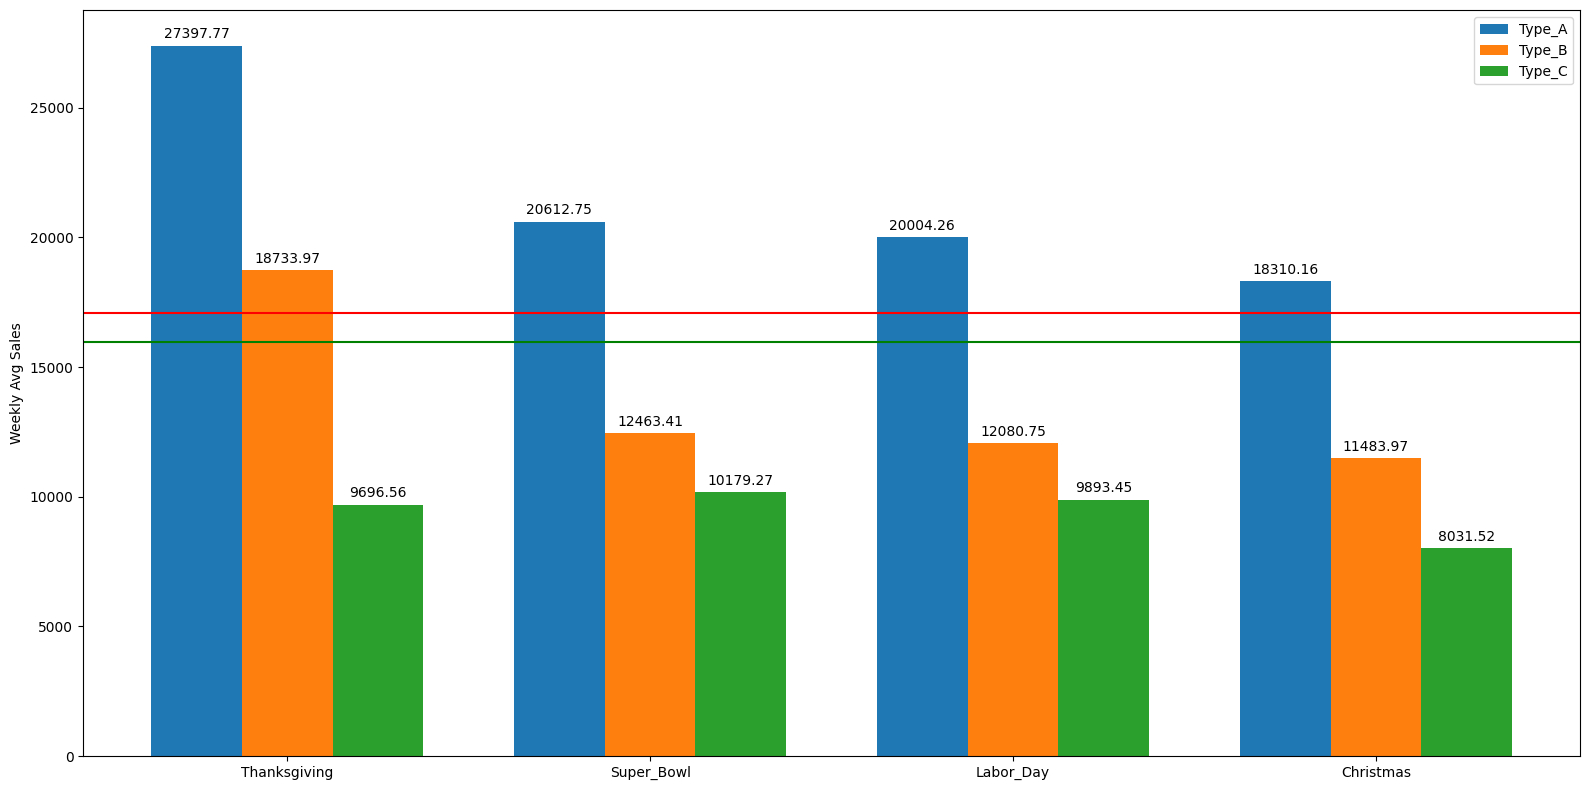

In [44]:
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

Due to Blackfriday sales in large stores the highest sale average is in the Thanksgiving week between holidays. And atore type A has the highest sales for all holidays naturally due to large capacity

In [45]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.0,0.00,0.00,0.00,182.783277,8.724,A,200898,False,False,True,False


top sales also belong to Thanksgiving naturally

now lets check relation between size and type of store

In [46]:
stores.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


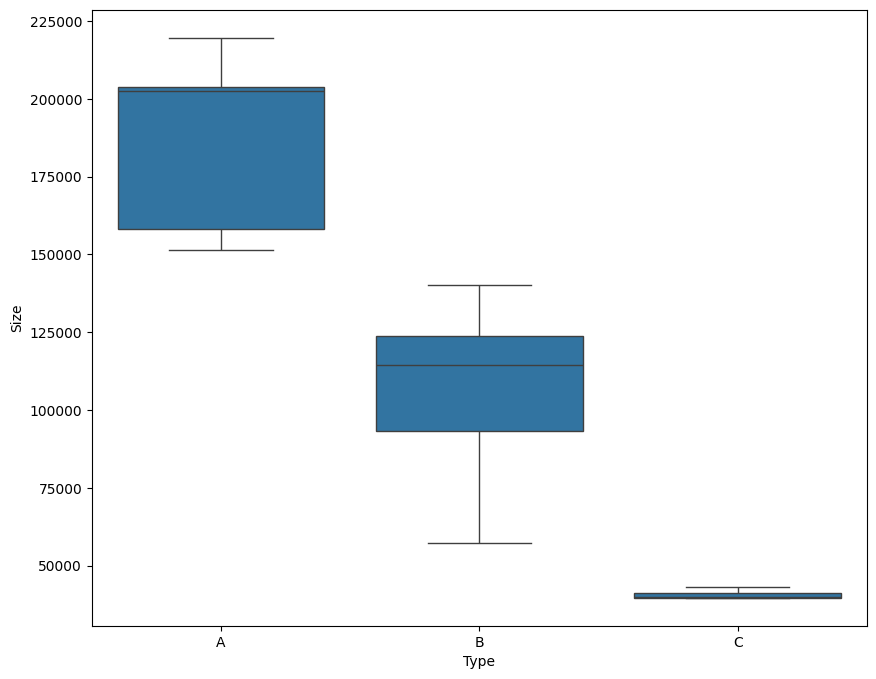

In [47]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.show()

As expected the size of type stores are consistent with the sales. Bigger stores have higher sales.

In [48]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


plotting the weekly sales of each department

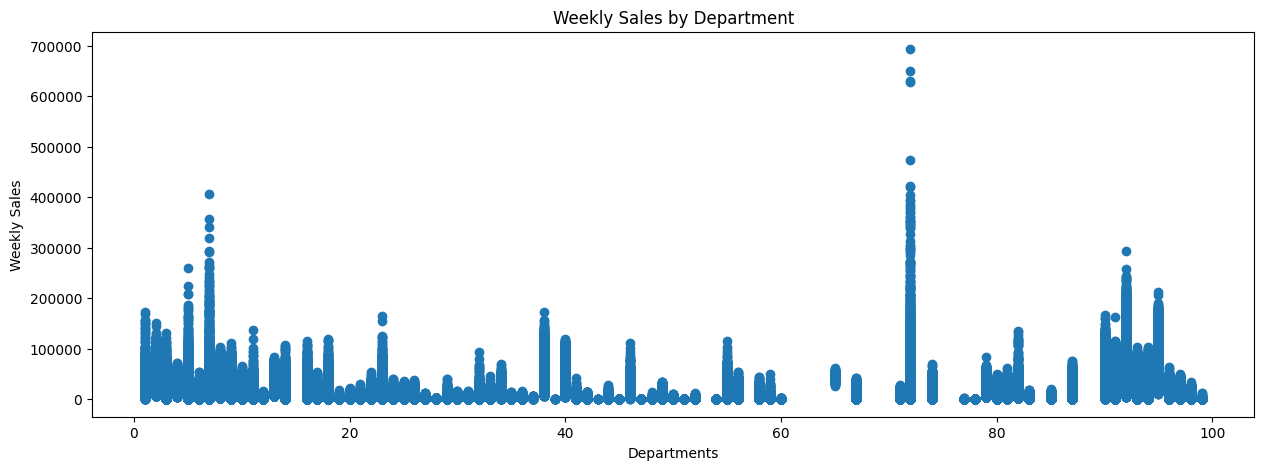

In [49]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

weekly sales for department 60-80(ssuming it is 72-73) is much higher than normal

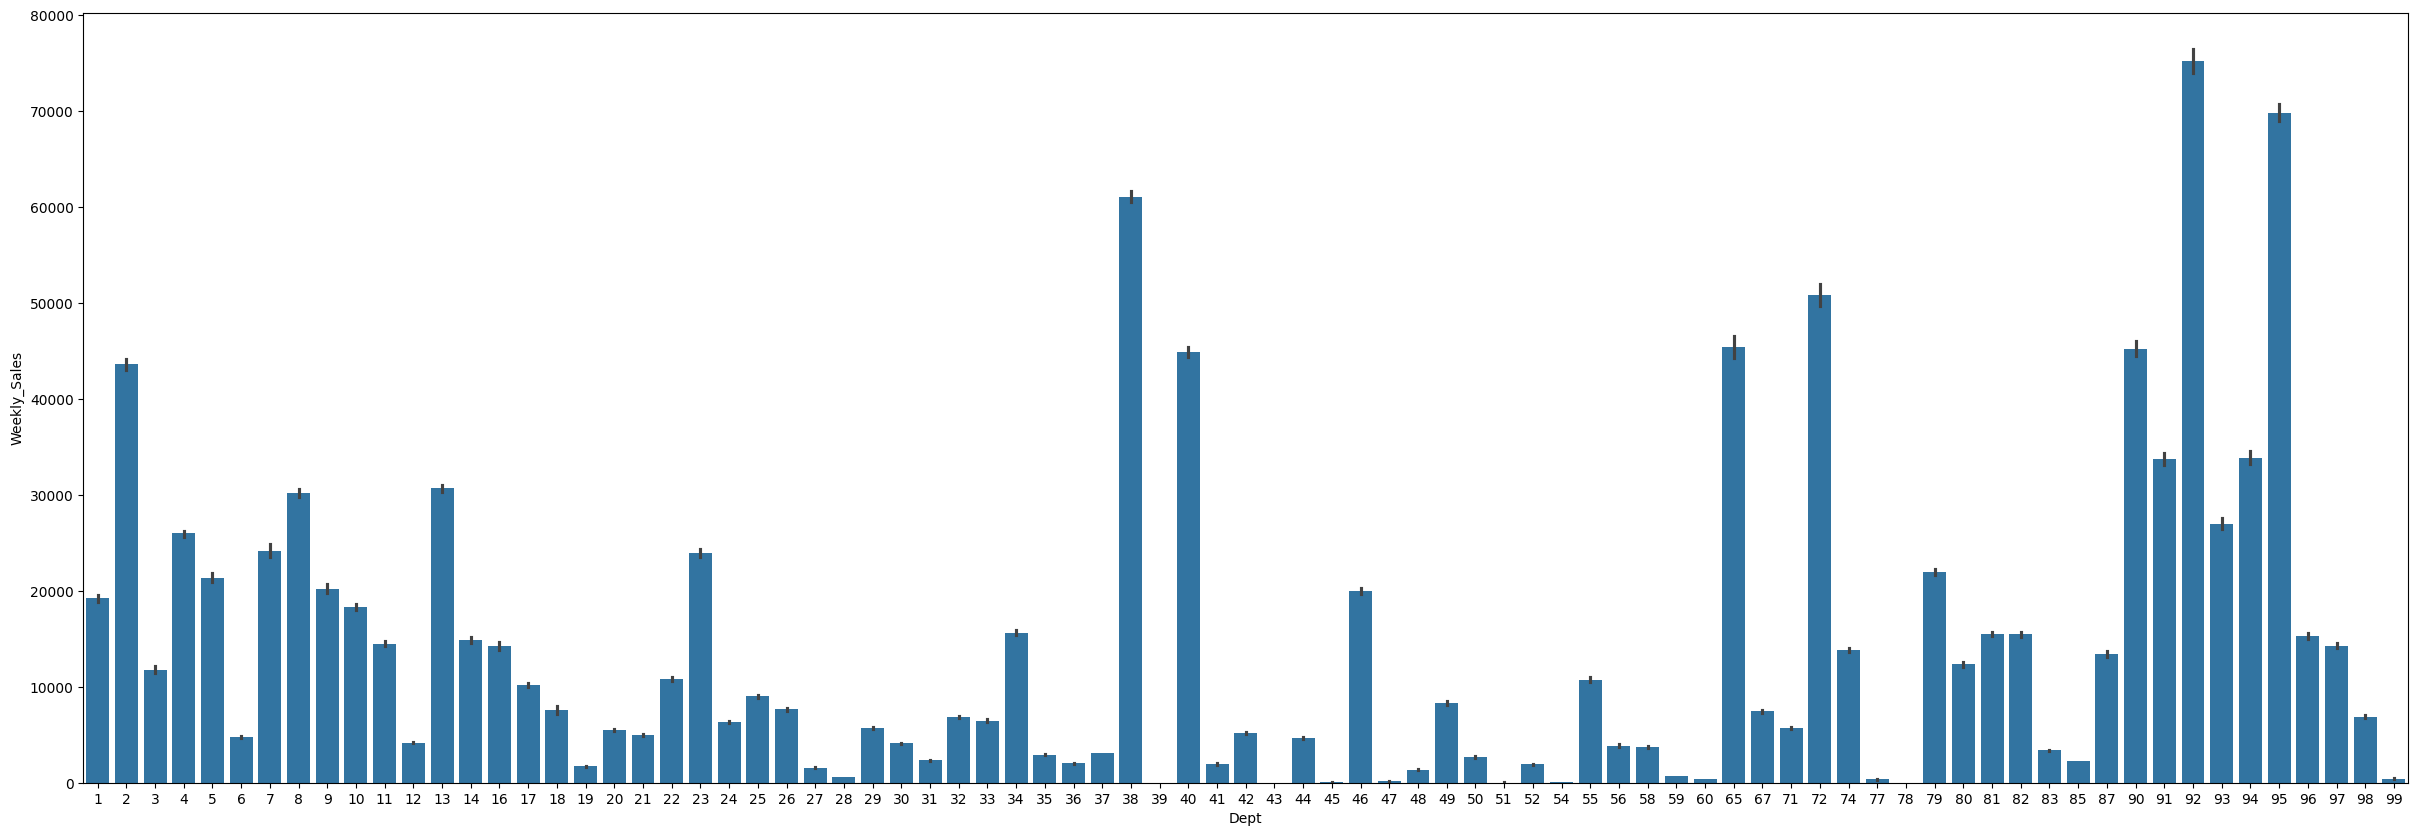

In [50]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

now we can see that altough the sales for 72 were higher indicating that It was a seasonal product and sales average for 92 are much higher

now lets look at weekly sales by stores

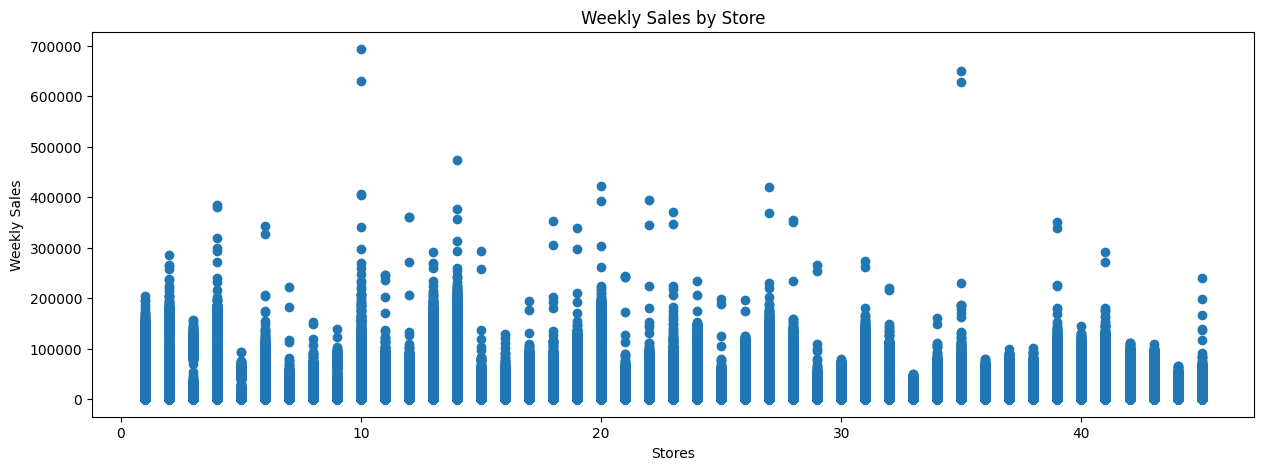

In [51]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

stores 10 and 35 have higher sales similarly due to seasonality

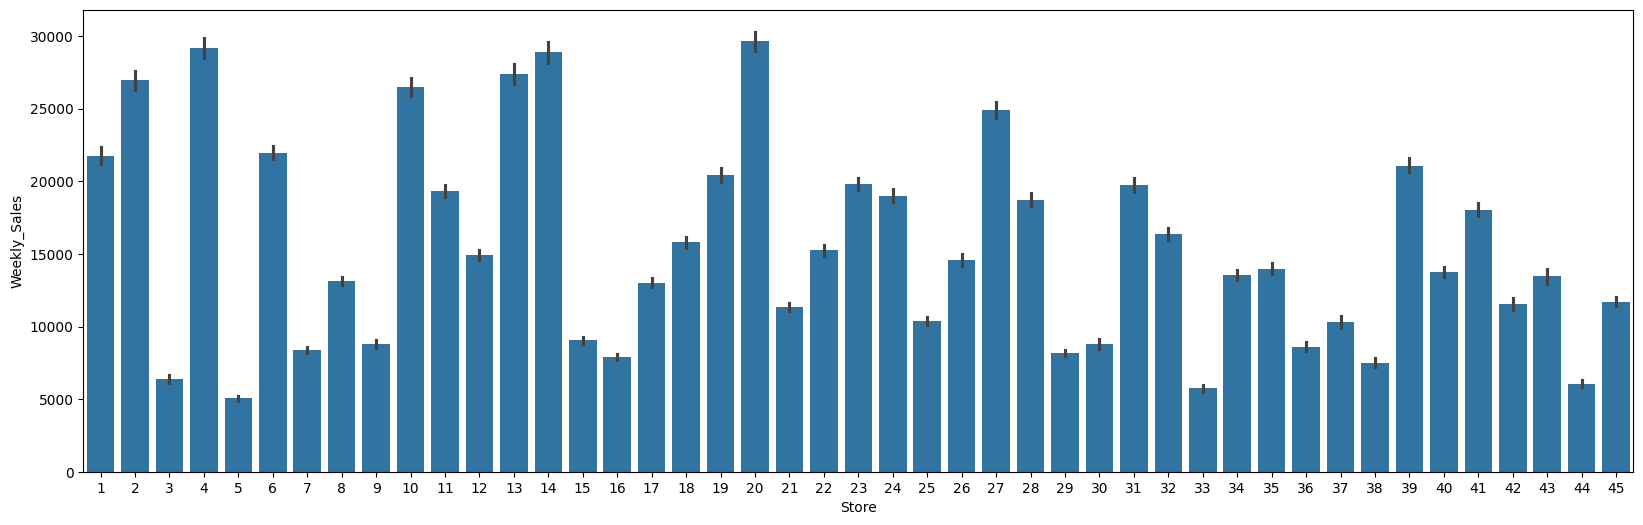

In [52]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

similarly, we can see that some stroes have higher sales but on average store 20 is the best and 4 and 14 are in second and third respectively

converitng date to datetime format

In [54]:
df["Date"] = pd.to_datetime(df["Date"])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month 
df['year'] = df['Date'].dt.year

checking for monthly sales averages for all the years

In [55]:
df.groupby('month')['Weekly_Sales'].mean()


month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

in December we can observe the most amount of sales

checking for yearly sales avrages

In [56]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

plotting the months to sales w.r.t years 

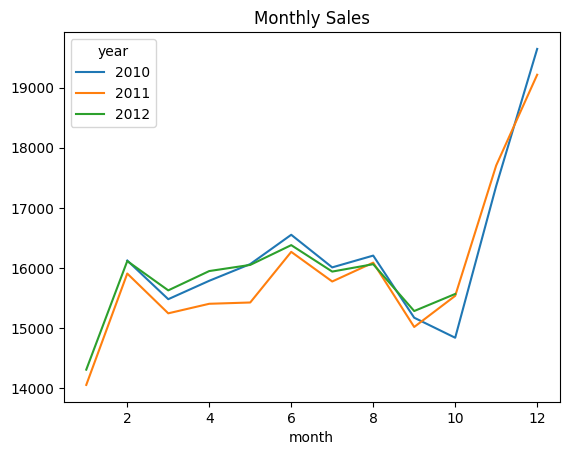

In [58]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()
plt.title("Monthly Sales")
plt.show()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

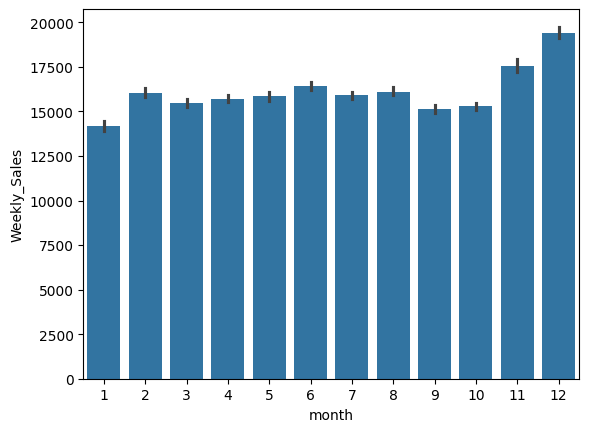

In [59]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

we can observe about that the best sales belong to November and December due to thanksgiving and December has the highest average sales.

checking which weeks had the highest sales

In [60]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

we can observe that the sales were high in 1-2 weeks before christmas which explains the prevoius graph for the Chirstmas Holiday sales and on THanksgiivng, Black Friday and end of May maybe when schools are clsed for holidays and vacaitons

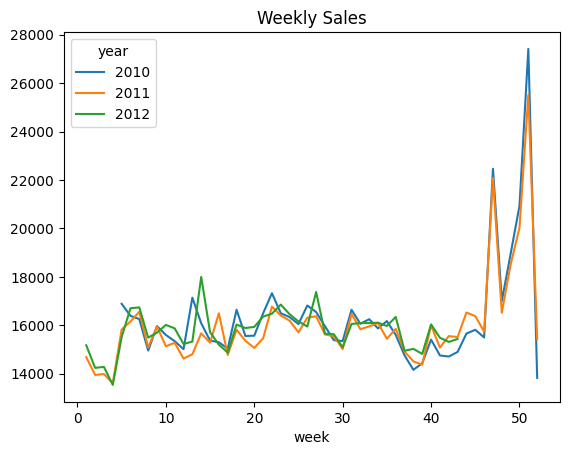

In [62]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()
plt.title("Weekly Sales")
plt.show()

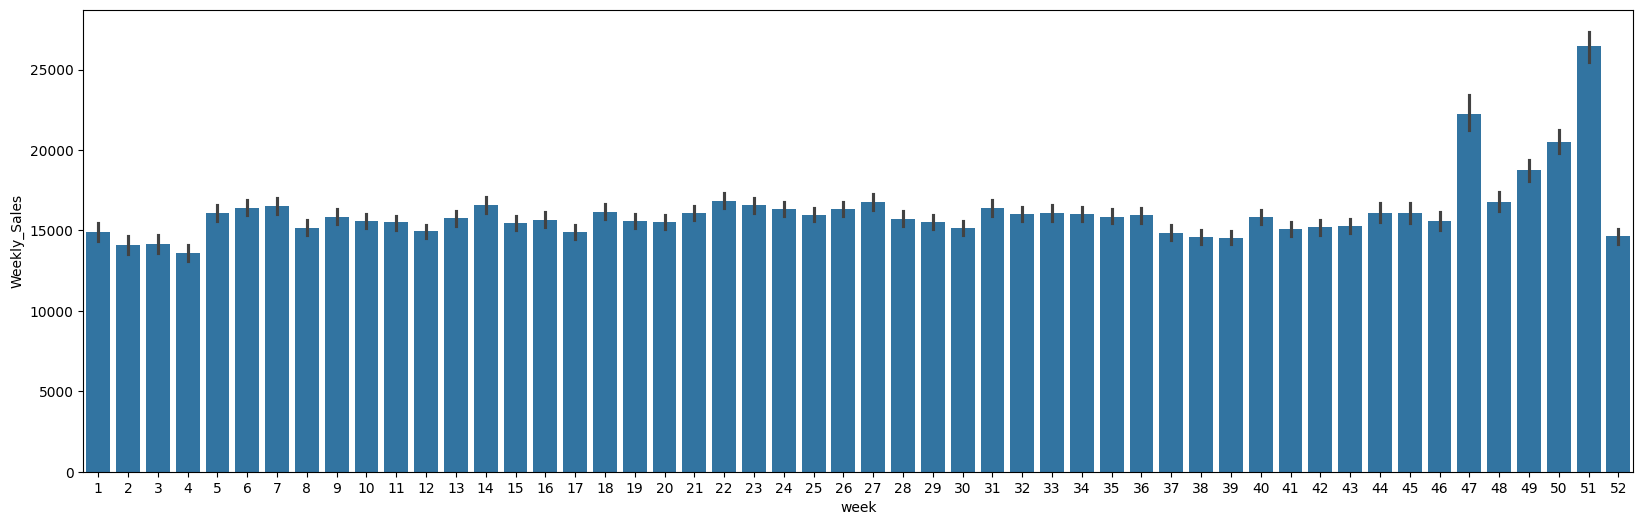

In [63]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

similar trends can be seend that 51st week and 47th week have significantly higher averages as Chirstmas, Thanksgiivng and BLack Friday were the major factores for them

now we can check the effect of Fuel Prices, CPI , Unemployement and Temparature on the weekly sales

In [64]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")

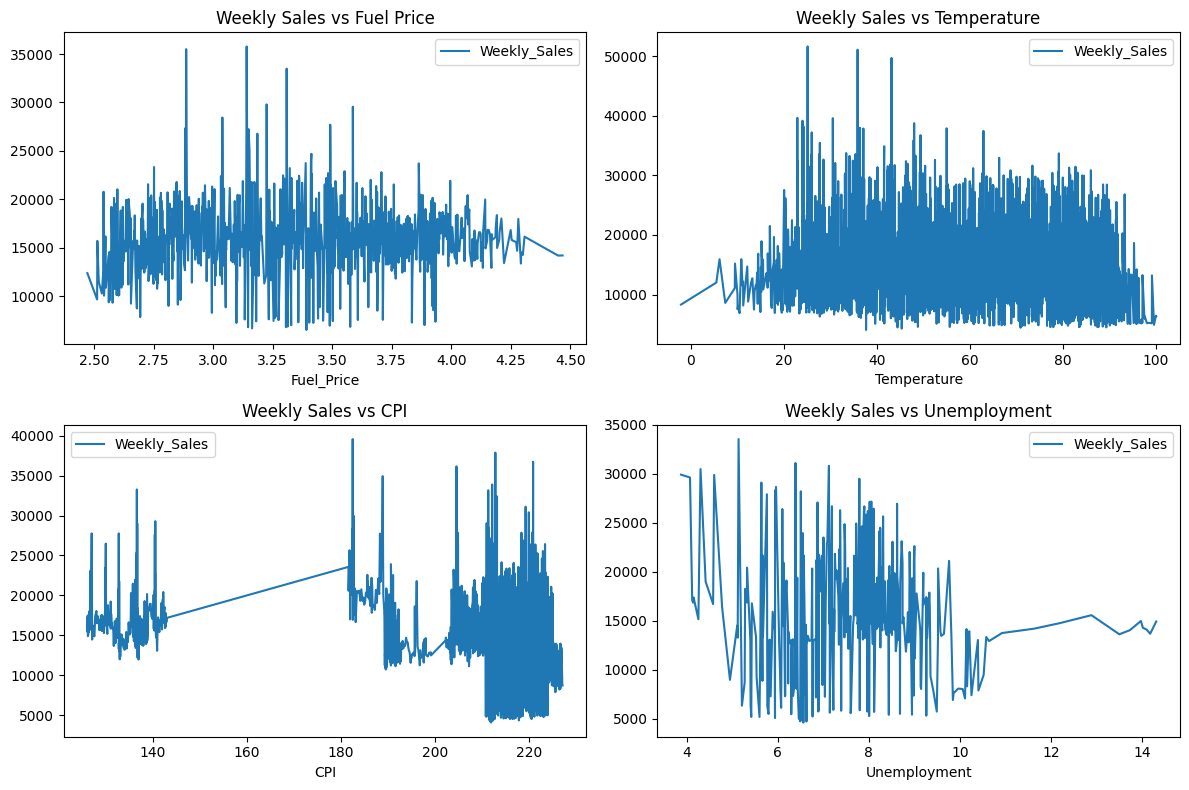

In [65]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot each pivot table on a subplot
fuel_price.plot(ax=axes[0, 0], title='Weekly Sales vs Fuel Price')
temp.plot(ax=axes[0, 1], title='Weekly Sales vs Temperature')
CPI.plot(ax=axes[1, 0], title='Weekly Sales vs CPI')
unemployment.plot(ax=axes[1, 1], title='Weekly Sales vs Unemployment')

# Adjust layout and display
plt.tight_layout()
plt.show()

form the grapghs we can see that the factors of CPI , Temparature , Unemployement and Fuel Prices have no effect on the weekly sales

export the final cleaned data for model building and training

In [66]:
df.to_csv('compdata/data_cleaned.csv')

## Findings

#### Cleaning techniques used

- Missing values were checked and handled appropriately
- Rows with negative values for the weekly sales were dropped which constituted for almost 0.3% of the total data which will not impact the dataset quality
- Null values in the markdown columns were set to 0.

#### Findings & Explorations

- There are 45 stores and 81 department in data. Departments are not same in all stores.
- Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time.
- Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales.
- Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
- As expected, holiday average sales are higher than normal dates.
- Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
- Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
- It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.
- January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
- CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.